<a href="https://colab.research.google.com/github/CODERdeeps/MLCDAC/blob/main/NB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ROC AUC Score: 0.9188525882061559


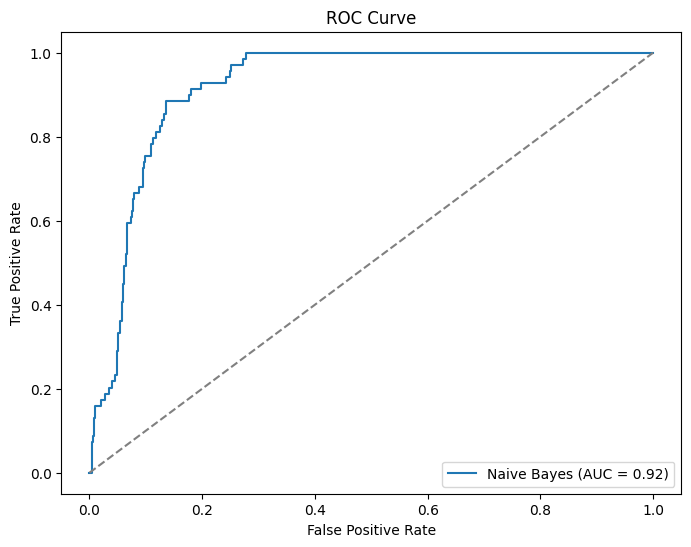

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load the dataset
data = pd.read_csv('Default.csv')

# Preprocess the data
X = data.drop('default', axis=1)
y = data['default']

# Perform label encoding for categorical variables
label_encoder = LabelEncoder()
X_encoded = X.apply(label_encoder.fit_transform)
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

# Perform Naive Bayes classification and calculate the ROC curve
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

y_prob = naive_bayes.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob, pos_label=1)

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC AUC Score:", roc_auc)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Naive Bayes (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

